In [1]:
# Используем библиотеку numpy для создания массивов случайных чисел различных распределений. Выполните этот код, 
# чтобы создать обучающий набор различных распределений:

import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

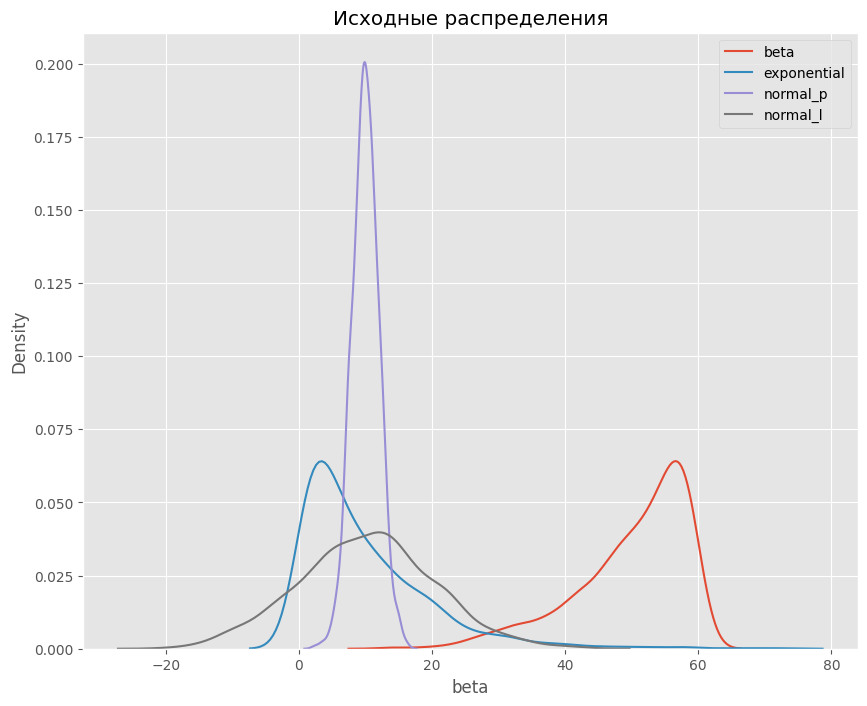

In [2]:
# Рассмотрим распределения на графике. Метод визуализации kdeplot() — это метод визуализации распределения наблюдений 
# в наборе данных. Он представляет собой непрерывную линию плотности вероятности.

# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [3]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


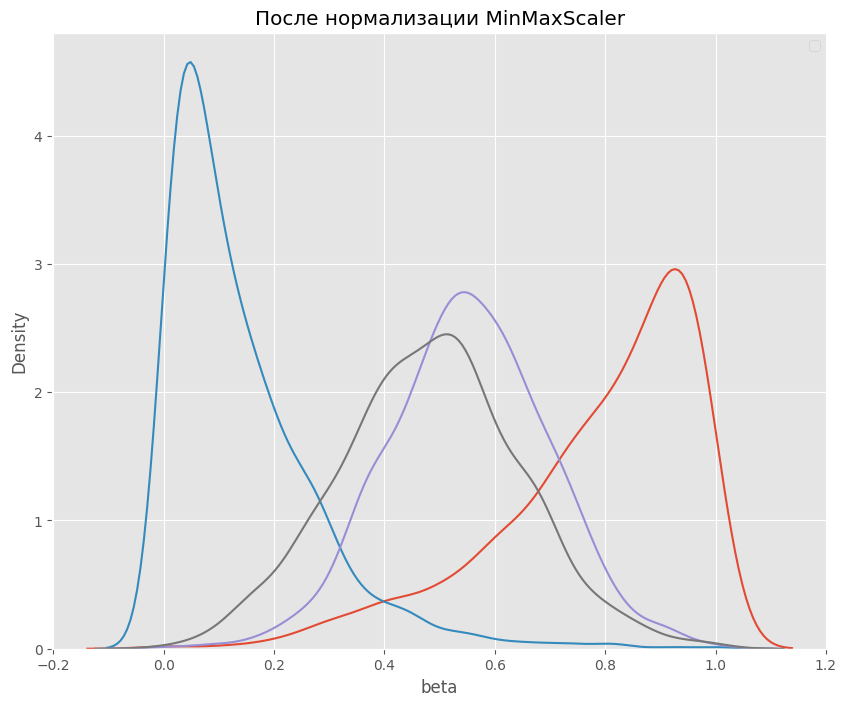

In [6]:
# Класс MinMaxScaler делает вышеописанную нормализацию автоматически при помощи функции преобразования fit_transform.

# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


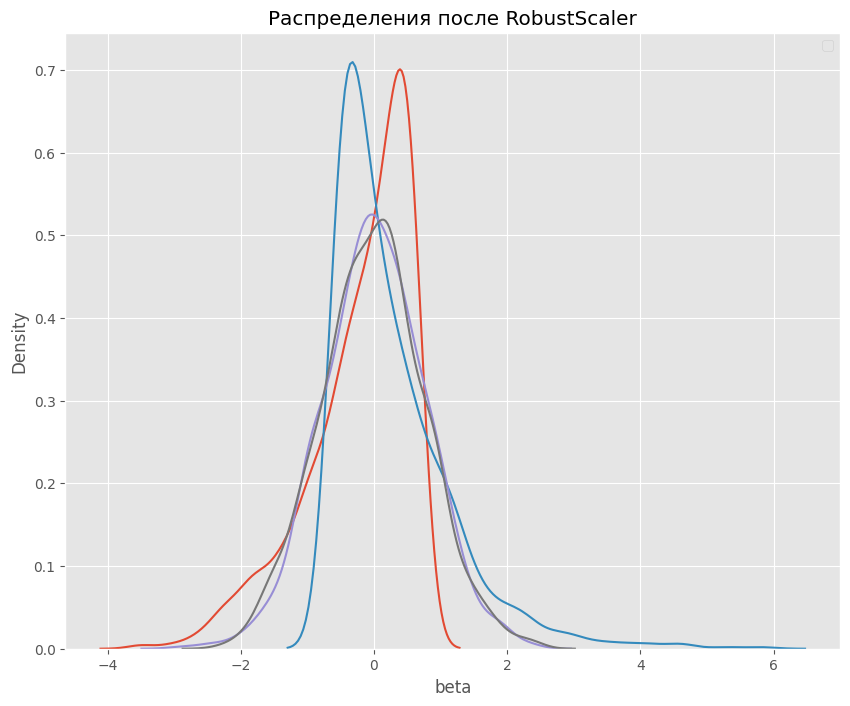

In [7]:
# Проведём нормализацию распределений признаков из обучающего примера, используя класс RobustScaler.

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)
plt.legend()

<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

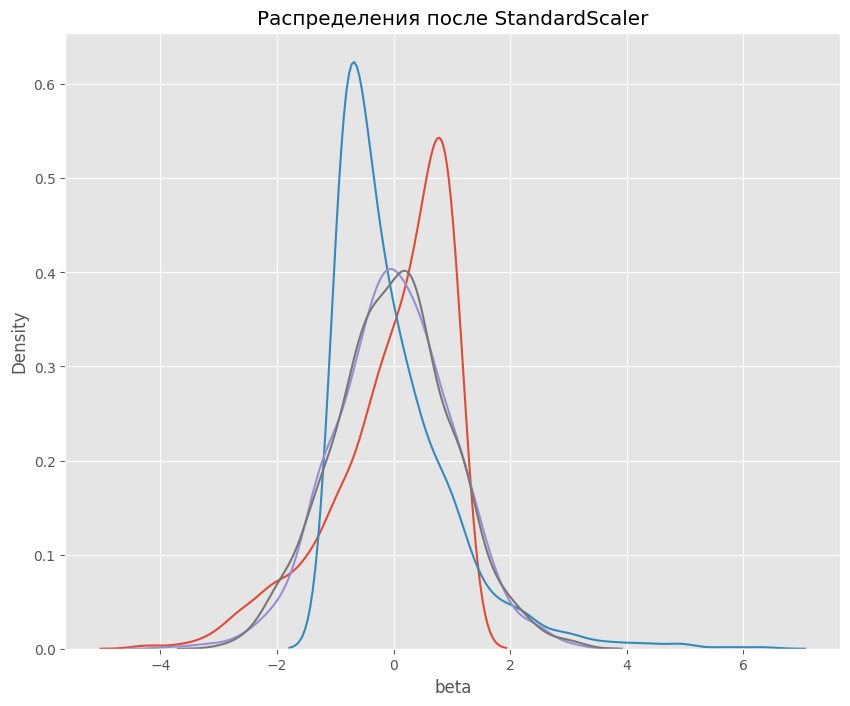

In [8]:
# Для стандартизации используем класс StandardScaler.

# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

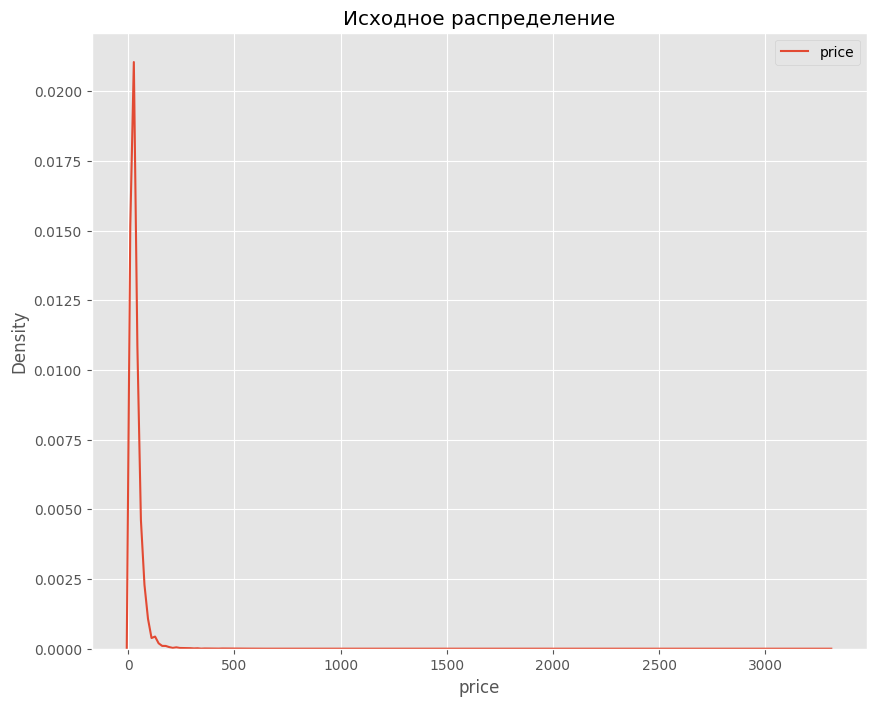

In [9]:
import pandas as pd
wine = pd.read_csv('C:\IDE\Skillfactory\EDA\\files\\data.csv')

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходное распределение')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(wine['price'], ax=ax1, label ='price')

In [37]:
numeric_cols = wine.select_dtypes(include='number').columns
    
df = wine[numeric_cols]
df

,Unnamed: 0,points,price,price_round,is_usa,is_france,is_italy,old_wine,area,years_diff
0,0,87,35.363389,35,0,0,1,0,301230.0,3298.0
1,1,87,15.000000,15,0,0,0,0,92391.0,4029.0
2,2,87,14.000000,14,1,0,0,0,9372610.0,3298.0
3,3,87,13.000000,13,1,0,0,0,9372610.0,3298.0
4,4,87,65.000000,65,1,0,0,0,9372610.0,3664.0
...,...,...,...,...,...,...,...,...,...,...
129967,129966,90,28.000000,28,0,0,0,0,357022.0,3298.0
129968,129967,90,75.000000,75,1,0,0,1,9372610.0,6586.0
129969,129968,90,30.000000,30,0,1,0,0,547030.0,3298.0
129970,129969,90,32.000000,32,0,1,0,0,547030.0,3664.0


In [41]:
r_scaler = preprocessing.RobustScaler()
wine_r = r_scaler.fit_transform(df)

wine_r = pd.DataFrame(wine_r)
wine_r[2].sum()

43500.77493697044